<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>Drugs' Reviews Analysis<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---


- **Sentiment analysis** (or opinion mining) uses NLP to determine whether data is positive, negative or neutral.

- It is often performed on **textual data** to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

- Hence it is of utmost **importance for businesses** to understand the **customer impression** as early as possible and do the **necessary course correction** if any.

<center><img src="https://d1sjtleuqoc1be.cloudfront.net/wp-content/uploads/2019/04/25112909/shutterstock_1073953772.jpg" width=50%></center>

- Customers leave tons of **reviews, advice, complaints** in a business portal. Reading and understanding all these take a **lot of manual effort, time**, and **costs**.

- It has become necessary to **develop a platform** that can summarise different **relevant metrics** for a business like most recent reviews, Overall rating, distribution of sentiments, trending keywords, and so on.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **ABC Pvt Ltd** is a **consumer healthcare online store** that provides consumers with on-demand, home delivered access to a wide range of prescription, OTC pharmaceutical, and other consumer healthcare products.

- Recently they are seeing an increase in **number of sales** as well as **reviews** on their website and app.

- The company wants to take further steps with such an increase in the traffic and implement some advanced systems for a visitor's benefit.

- They also want to know the **product reviews** look like on their website and how much **overall rating** the website receives.

<center><img src="https://www.clipartmax.com/png/full/264-2646150_general-store-clip-art.png" width=40%></center>

- To do so, they have hired you - a data scientist whose job is to go through a **dataset scraped** from their website.

- The dataset provides **patient reviews** on specific drugs along with related conditions and a **10-star patient rating system** reflecting overall patient satisfaction.

- This data can be used in a **study on sentiment analysis** of drug experience over multiple facets.

- An **general analysis** is necessary before deep diving into the sentiment analysis.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

     |████████████████████████████████| 69 kB 3.2 MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

     |████████████████████████████████| 721 kB 28.3 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 261 kB 32.5 MB/s 
     |████████████████████████████████| 62 kB 938 kB/s 
     |████████████████████████████████| 10.1 MB 52.2 MB/s 
     |████████████████████████████████| 675 kB 42.4 MB/s 
     |████████████████████████████████| 102 kB 15.3 MB/s 
     |████████████████████████████████| 596 kB 74.8 MB/s 
     |████████████████████████████████| 3.1 MB 54.7 MB/s 
     |████████████████████████████████| 812 kB 52.0 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incom

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import zipfile                                                      # To ease with opening zip files
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
%matplotlib inline                                                  # To plot graphs in notebook
import matplotlib.pyplot as plt                                     # A popular plotting library used along with pandas
import seaborn as sns                                               # A library, built on matplotlib, for beautiful plots
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
from wordcloud import WordCloud                                     # To create wordclouds
from wordcloud import STOPWORDS                                     # To import a list of stopwords that remove unnecessary unicode text

---
<a name = Section4></a>
# **4. Data Acquisition & Wrangling**
---

|Dataset| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
| Drugs' Reviews Analysis | 215063 | 7 | 39.8 MB |

<br>

|ID|Feature name|Feature description|
|:--|:--|:--|
|1|**uniqueID**| Patient Identifier |
|2|**drugName**| Name of the Drug |
|3|**condition**| Patient's condition for which the drug was bought |
|4|**review**| Review given by the patient |
|5|**rating**| Rating given by the patient |
|6|**date**| Date of the review |
|7|**usefulCount**| How many other patients found this patient's review useful?|

In [ ]:
# Read the dataset using the compression zip
data = pd.read_csv('/content/data.zip', compression='zip')
print('Dataset Shape:', data.shape)
data.head()

Dataset Shape: (215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,27-Nov-16,37


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000



**Observations:**

- **rating** ranges from **1** to **10**.

- **usefulCount** ranges from **0** to **1291**, averaging at **28.0**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


**Observations:**

- There are **2 int64 features** (except for uniqueID), and **4 object data type** features.

- We can extract and use **additional information** from the **date** feature.

- We will see the **profiling report** to get more information on these features.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

- For quick analysis pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column, statistics are presented in an interactive HTML report.

In [ ]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

**Observations:**

- There are **3 numeric** and **4 categorical features**, according to the pre-profiling report.

- There are **no duplicate rows** present in the dataset.

- **drugName**, **condition**, and **review** have **high cardinality** (more unique values).

- **usefulCount** has **8402 (3.9%) zeros**.

In [ ]:
data.isna().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

**Observations:**

- condition feature has **1194 missing values**, which we will replace with the mode of the feature.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations on the data using information from the previous section.

- We will simply **replace** the **cell values** that contain **missing** values with **mode** of the feature.

- Additionally, a **new feature**, named as **Review_Sentiment** will be created **based on the rating** given.

- We will also extract **year**, **month**, and **day of the week** of the reviews.

In [ ]:
# Replacing null values with mode of condition
data['condition'].fillna(data['condition'].mode()[0], inplace=True)

# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['Month'] = data['date'].dt.month_name().str[:3]

# extracting the days from the date
data['day'] = data['date'].dt.day

# Creating the new Review_Sentiment feature: 1 = Positive Sentiment, 0 = Negative Sentiment
data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

stopwords = set(list(STOPWORDS) + ["quot"])

data.head()

<a name = Section7></a>

---
# **7. Data Post-Profiling**
---

- In this section, we will observe the changes after performing data pre-processing, if present.

In [ ]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Post Profiling Report.html')
print('Accomplished!')

**Observations**:

- There are **no missing values** in the dataset.

- There are **no duplicate values** in the dataset.

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

**<h4>Question:** Which drugs are present the most in the given dataset?</h4>

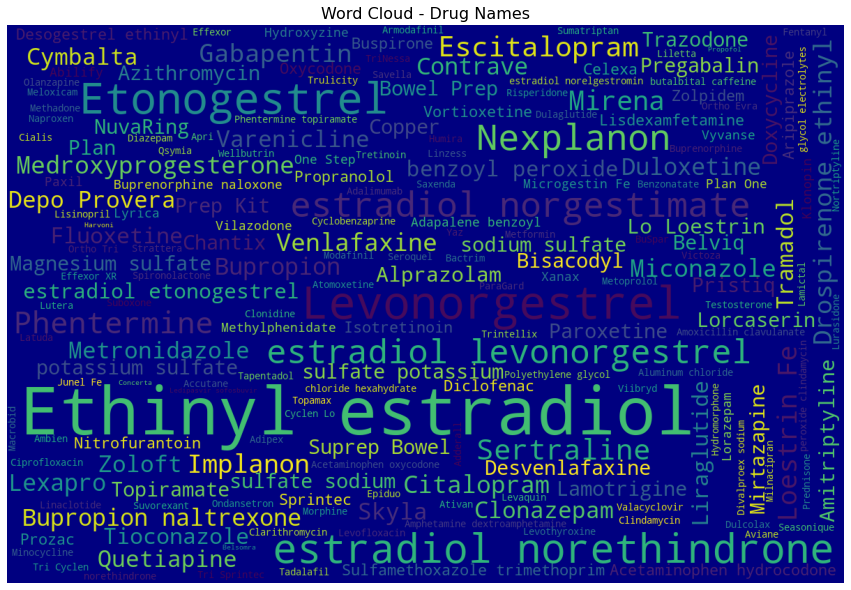

In [ ]:
# There are many ways to determine - We will use a WordCloud

# Create a figure with 15x15 inch dimension
fig = plt.figure(figsize=(15, 15))

# Create a wordcloud
wordcloud = WordCloud(background_color = 'navy', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

# Beautifying the wordcloud
plt.title('Word Cloud - Drug Names', fontsize = 16)
print(wordcloud)
plt.axis('off', interpolation='bilinear')
plt.imshow(wordcloud)
plt.show()

**Observations:**

- **Levonorgestrel**, **Ethinyl estradiol**, **estradiol norethindrone**, **estradiol levonorgestrel**, and **Nexplanon** are some of the common drugs in this dataset.

**<h4>Question:** Which are top 20 rated drugs according to the given dataset?</h4>

In [ ]:
# Extract labels and values of top rated drugs

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
labels = list(rating.keys())
values = list(rating.values())

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values[19::-1], 
                           y=labels[19::-1], 
                           orientation='h'))

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1200, 
                  title_text='Top 20 drugs with 10/10 rating', 
                  title_x=0.5, 
                  xaxis_title='Number of Ratings', 
                  yaxis_title='Drug Name')

fig.update_traces(marker_color='orange', marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)

# Display the figure
fig.show()

**Observations:**

- **Levonorgestrel** is the **top rated drug** in the dataset.

- According to **Wikipedia**, it is a hormonal medication which is used in a number of **birth control methods**.

- Levonorgestrel is followed by **Phentermine**, which is a medication used together with **diet** and **exercise** to **treat obesity**.

- Additionally, **Etonogestrel** ranks third, which is also a **birth control medication**.

- These are followed by **Varenicline** (for smoking cessation), **Ethinyl estradiol** and **norethindrone** (another birth control combination), and **Escitalopram** (antidepressant).

**<h4>Question:** Which are lowest rated drugs (rating=1) according to the given dataset?</h4>

In [ ]:
# Extract labels and values of lowest rated drugs

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
labels = list(rating.keys())
values = list(rating.values())

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values[19::-1], 
                           y=labels[19::-1], 
                           orientation='h'))

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1200, 
                  title_text='Lowest rated drugs with 1/10 rating', 
                  title_x=0.5, 
                  xaxis_title='Number of Ratings', 
                  yaxis_title='Drug Name'
                  )

fig.update_traces(marker_color='cyan', marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)

# Display the figure
fig.show()

**Observations:**

- **Miconazole** has the highest number of **lowest rating** in the dataset.

- It is an **antifungal medication** used to treat ring worm, pityriasis versicolor, and yeast infections.

- We can observe various **combinations of Ethinylestradiol**, which is an estrogen medication, used widely in **birth control pills**.

- We have other drugs in this list such **Nexplanon**, **Etonogestrel**, and **Levonorgestrel**, which are all related to **birth control**.

- **Majority of the drugs** in this dataset seem to be related to **birth control**.

**<h4>Question:** Which are most common conditions, for which the drugs are reviewed according to the given dataset?</h4>

In [ ]:
# Extract labels and values of most common conditions

condition = dict(data["condition"].value_counts())
labels = list(condition.keys())
values = list(condition.values())

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values[19::-1], 
                           y=labels[19::-1], 
                           orientation='h'))

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1200, 
                  title_text='Top 20 conditions among the reviewers', 
                  title_x=0.5, 
                  xaxis_title='Number of Ratings', 
                  yaxis_title='Condition Name'
                  )

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)

# Display the figure
fig.show()

**Observations:**

- The assumption was right, most of the conditions reported are regarding **birth control**.

- This is followed by **Depression**, **Pain**, **Anxiety**, and **Acne**.

- Let's see the rating distribution of the drugs.

**<h4>Question:** What is rating distribtion of drugs in this dataset?</h4>

In [ ]:
# Extract labels and values of ratings
labels = data['rating'].value_counts().index
values = data['rating'].value_counts().values

# Initiate an empty figure
fig = go.Figure()

# Add a trace of pie to the figure
fig.add_trace(trace=go.Pie(labels=labels, 
                           values=values, 
                           hole=.6
                           ))

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1000, 
                  title_text='Pie Chart Representation of Ratings',
                  title_x=0.5,
                  )

fig.update_traces(textfont_size=12,
                  marker=dict(line=dict(color='#000000', width=2)))

# Display the figure
fig.show()

**Observations:**

- **Almost 50%** of the reviews are **good** (10 and 9 rating).

- Then we have a unexpected high bad ratings (rating=1) as well.

- The number of ratings between **rating=2** and **rating=8** (both inclusive), is **consistent** and **equal**.

**<h4>Question:** What is sentiment distribtion of the rated drugs in this dataset?</h4>

In [ ]:
# a pie chart to represent the sentiments of the patients

values = data['Review_Sentiment'].value_counts().values
labels = ["Positive Sentiment", "Negative Sentiment"]
colors = ['gold', 'blue']

# Initiate an empty figure
fig = go.Figure()

# Add a trace of pie to the figure
fig.add_trace(trace=go.Pie(labels=labels, 
                           values=values,
                           pull=[0, 0.2]))

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1000, 
                  title_text='Pie Chart Representation of Ratings',
                  title_x=0.5)

fig.update_traces(textfont_size=12, marker=dict(line=dict(color='#000000', width=2), colors=colors))

# Display the figure
fig.show()

**Observations:**

- **75.1%** of the reviews show positive sentiment.

- Let's check the sentiment towards various drugs' conditions, which should give us a deeper insight on the data.

**<h4>Question:** What are the most commonly occurring words in the positive reviews?</h4>

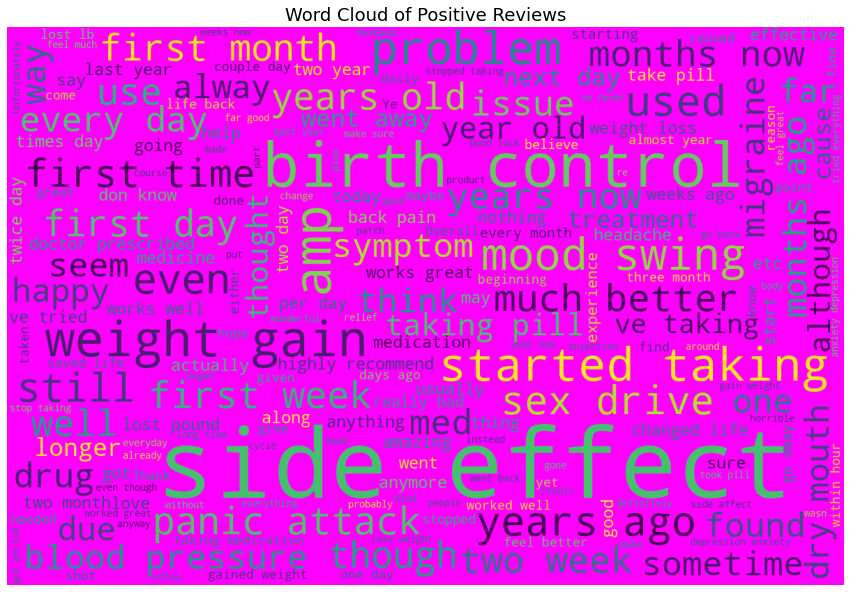

In [ ]:
positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

# Create a figure with 15x15 inch dimension
fig = plt.figure(figsize=(15, 15))

wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.title('Word Cloud of Positive Reviews', fontsize = 18)
print(wordcloud)
plt.axis('off', interpolation='bilinear')
plt.imshow(wordcloud)
plt.show()

**Observations:**

- **Side effects**, **birth control**, **started taking**, and **problem** are some of the most commonly occuring words in the positive reviews.

**<h4>Question:** What are the most commonly occurring words in the negative reviews?</h4>

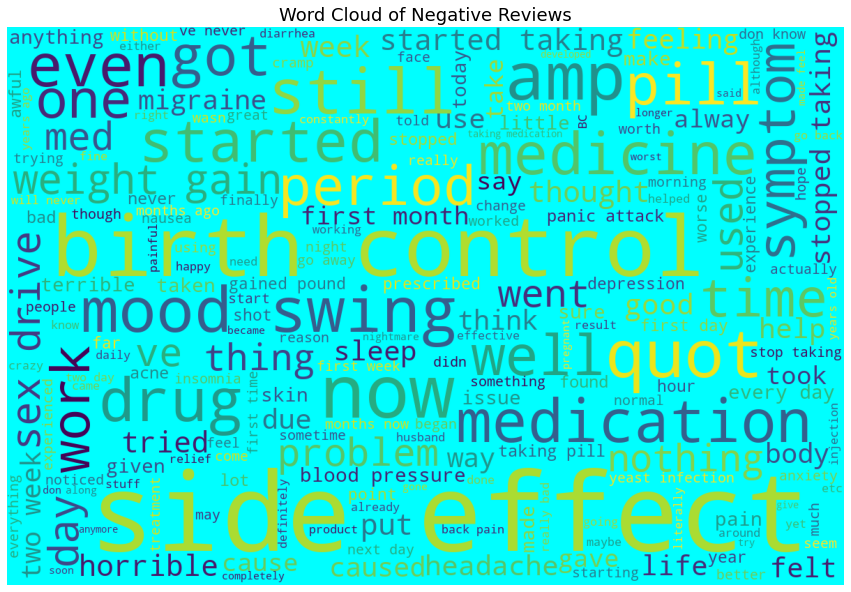

In [ ]:
negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

# Create a figure with 15x15 inch dimension
fig = plt.figure(figsize=(15, 15))

wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.title('Word Cloud of Negative Reviews', fontsize = 18)
print(wordcloud)
plt.axis('off', interpolation='bilinear')
plt.imshow(wordcloud)
plt.show()

**Observations:**

- Similar to the positive reviews **side effects**, **birth control**, and **started taking** are some of the most commonly occuring words in the negative reviews.

- These are accompanies with **medication**, **mood swing**, **pill**, **even one**, **still** and many more words.

**<h4>Question:** Did the frequency of reviews increase over the years?</h4>

In [ ]:
# Extract labels and values of top rated drugs
values = data['Year'].value_counts().index
labels = data['Year'].value_counts().values
colors = ['blue', 'red', 'yellow', 'green', 'cyan', 'grey', 'orange', 'purple', 'navy', 'magenta',]

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values,
                           y=labels))

# Update the layout with some cosmetics

fig.update_layout(height=600, 
                  width=1200, 
                  title_text='The No. of Reviews each year', 
                  title_x=0.5, 
                  xaxis_title='Year', 
                  yaxis_title='Count of Reviews'
                  )

fig.update_traces(marker_color=colors, marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)

# Display the figure
fig.show()

**Observations:**

- We can see an **increasing trend** in number of reviews over the years.

- The website must be selling a lot of medicinal drugs and the reviews indicate more returning traffic towards the website.

- The early reviews date back **from 2008** to recent reviews from **2017**.

- **2008** received the **lowest number** of reviews while **2016** received the **highest number** of reviews.

**<h4>Question:** What is the monthly frequency of reviews across all the years?</h4>

In [ ]:
# Extract labels and values of top rated drugs
values = data['Month'].value_counts().index
labels = data['Month'].value_counts().values
colors = ['blue', 'red', 'yellow', 'green', 'cornsilk', 'grey', 'darkorange', 'purple', 'burlywood', 'magenta', 'mediumturquoise', 'lightgreen']

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values,
                           y=labels))

# Update the layout with some cosmetics

fig.update_layout(height=600, 
                  width=1200, 
                  title_text='The No. of Reviews received each Month', 
                  title_x=0.5, 
                  xaxis_title='Month', 
                  yaxis_title='Count of Reviews'
                  )

fig.update_traces(marker_color=colors, marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)

# Display the figure
fig.show()

**Observations:**

- Almost all the months see **similar amount of reviews** over the years.

- We don't see any particular trend like in year-wise data.

**<h4>Question:** How many reviews are written on each day of the month over all the months and years in this dataset?</h4>

In [ ]:
# Extract labels and values of top rated drugs
values = data['day'].value_counts().index
labels = data['day'].value_counts().values

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values,
                           y=labels))

# Update the layout with some cosmetics

fig.update_layout(height=600, 
                  width=1200, 
                  title_text='The No. of Reviews each Day of a Month', 
                  title_x=0.5, 
                  xaxis_title='Day', 
                  yaxis_title='Count of Reviews'
                  )

fig.update_traces(marker_color='blue', marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)

# Display the figure
fig.show()

**Observations:**

- Similar to monthly data, we don't see any particular trend here.

- An exception is 31st day of the month, which is exclusive to some months and saw the least amount of reviews.

- **Day 7** seems to have received the **most number of reviews**.

**<h4>Question:** Create a summary of number of reviews received every month of every year</h4>

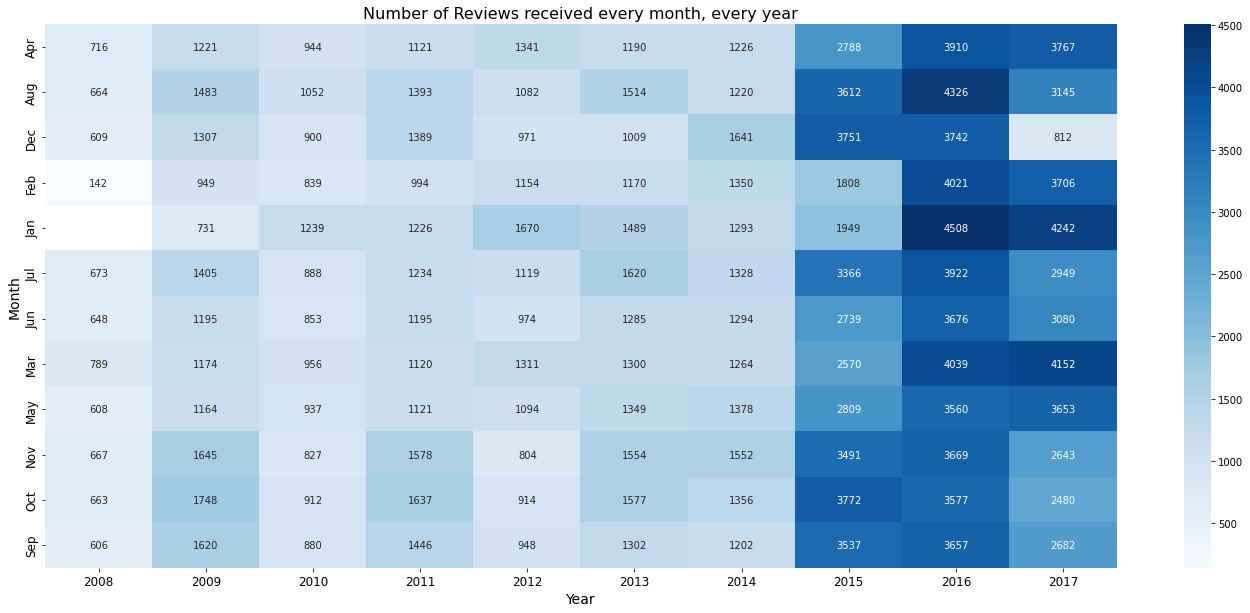

In [ ]:
plt.figure(figsize=(24, 10))

# Creating a group and sorting unique values for invoice numbers
grouped_df  = data.groupby(["Month", "Year"])["uniqueID"].unique().reset_index()

# Calculating number of orders for every hour of every day
grouped_df["number_of_ratings"] = grouped_df["uniqueID"].apply(len)

# Creating a pivot table from the grouped_df
grouped_df = grouped_df.pivot('Month', 'Year', 'number_of_ratings')

# Create a heatmap
sns.heatmap(data=grouped_df, annot=True, cmap='Blues', fmt='g')

# Adding some cosmetics
plt.title(label="Number of Reviews received every month, every year", fontsize=16, y=1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Year', fontsize=14)
plt.ylabel(ylabel='Month', fontsize=14)

# Display the heatmap
plt.show()

**Observations:** 

- **2015**, **2016**, and **2017** saw a **substantial growth** in the number of reviews.

- We observe a transition between **2014 and 2015** where number of **reviews are consistently increasing**.

- **Similar transition** can be observed between **2015-2016** and **2016-2017**.

**<h4>Question:** What can be inferred from the usefulCount feature?</h4>

In [ ]:
# Create a histogram for usefulCount feature
fig = go.Figure(data=[go.Histogram(x=data['usefulCount'])])

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1200, 
                  title_text='The No. of Useful Reviews', 
                  title_x=0.5,
                  xaxis_title='No. of Useful Counts', 
                  yaxis_title='Range of Useful Counts'
                  )

fig.update_traces(marker_color='red',
                  opacity=0.6)

# Display the figure
fig.show()

- Checking using a boxplot:

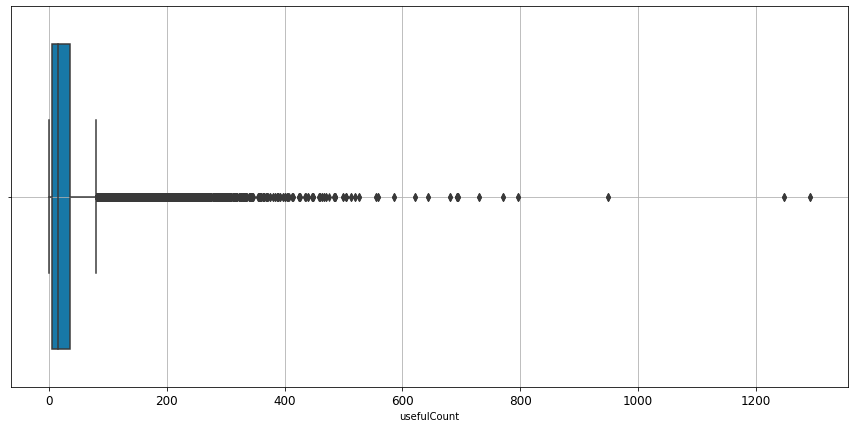

In [ ]:
fig = plt.figure(figsize=(15, 7))
sns.boxplot(x = data['usefulCount'], hue=data['Review_Sentiment'], palette='winter')

# Adding Cosmetics
# plt.xlabel(xlabel='Condition', fontsize=14)
# plt.ylabel(ylabel='Count (in thousands)', fontsize=14)
# plt.title(label='Sentiment on various conditions', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations:** 

- Most of the reviews are **not very popular**, they are generally get **under 100 votes**.

- But there are some extreme outliers, indicating that a **couple reviews** received **more than 1200 votes**.

- There are also many reviews which have received votes **ranging from 100 votes to 800 votes**.

---
<a name = Section9></a>
# **9. Summarization**
---




<a name = Section91></a>
### **9.1 Conclusion**

- We observed an **increasing trend** in number of reviews over the years.

- **Birth Control pills** are reviewed (and certainly bought) the most on the website.

- This is followed by **Depression**, **Pain**, **Anxiety**, and **Acne**.

- **Levonorgestrel** is the **top rated drug**, followed by **Phentermine**, **Etonogestrel**, **Varenicline** , **Ethinyl estradiol & norethindrone** , and **Escitalopram**.

- Some lower rated drugs include **Miconazole**, combinations of **Ethinylestradiol**, **Nexplanon**, **Etonogestrel**, and **Levonorgestrel**.

- Most of the reviews are **positive**, and based on ratings, we can assume **75% reviews** indicate **positive sentiment**.

<a name = Section92></a>
### **9.2 Actionable Insights**

- Owing to the increasing traffic, the website can leverage the use of a **freemium subscription model**.

- These subscription plan can **offer suggestions** based on **prescriptions** and **reviews**, and can **include discounts**.

- The website can also implement a **sentiment analysis system** to determine if the review was positive or negative based, considering the number of votes.

- Make relevant **product recommendations** to the customers using **precision marketing** and **reviews**.

- Although the website mostly receives positive reviews, the team should aim at receiving **more positive impact**.

- This can be done by **determining the drugs** that are most likely to get negative reviews and we can find the causes behind them.